# 04 Monte Carlo Sampling and Simulation

This lesson was developed using materials from the [Computational Physics](http://www-personal.umich.edu/~mejn/cp/) book by Mark Newman at University of Michigan and materials prepared by me for PHYS 202 at [Cal Poly](http://physics.calpoly.edu).

---

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plot
from IPython.html.widgets import interact, interactive
from scipy.integrate import trapz,cumtrapz

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Monte Carlo Simulation

There are many areas of physics where it is useful to simulate a phenomenon before we conduct an experiment, to help guide the experimental design and procedure.  There are also cases where we use simulations of an experiment after the fact to correct for any instrumental biases.  

For example, in high energy particle and nuclear collisions, we need to know how well our detectors "see" the particles produced in the collisions so we can optimize their design to catch as many as possible.  We can use Monte Carlo sampling to simulate the stochastic nature of the interaction of particles with matter to model the "response" of our detector to particles of a known type and energy.  The input to the simulation represents the "true" distribution of particles, while the output corresponds to an estimate of the "observed" distribution of particles, assuming that we have accurately characterized the physics of the interactions in our simulation.  The ratio of input to output can be used as a correction factor to estimate the "true" distribution of particles from the "observed" distribution in a real experiment.  Obviously, reliable simulations are essential to producing good results.

The [GEANT4](http://www.geant4.org/geant4/) package, written in C++, and its Fortran 77 precursor GEANT3, are toolkits for simulating the passage of particles through matter.  The simulations use Monte Carlo sampling to approximate the inherently stochastic processes that govern particle interactions.  All of the LHC experiments and many other high energy particle and nuclear physics experiments rely on it.  The physics in the package has been tested repeatedly against benchmark experimental data to validate its output.  It is a complex program that can be daunting when you first start using it, so many concrete examples are provided with the software to show how it can be used in different contexts.  Assessing radiation damage and the interaction of particle beams with human tissue for medical applications are two notable examples.  



## Example: Monte Carlo Glauber Model

Nuclei are composed of an ensemble of tightly bound protons and neutrons, which are in turn, tightly bound ensembles 
of quarks and gluons.  If two nuclei are made to collide at very high energies, such as at the CERN Large Hadron 
Collider (LHC), they can vaporize into quarks and gluons and form a Quark Gluon Plasma.

The left-hand figure below shows two Au (gold) nuclei just after a grazing collision in which only a fraction of the 
197 protons and neutrons (collectively called *nucleons*) actually interact.  The right-hand side of the figure shows 
the substructure of the nucleons, which are composed of three valence quarks and the gluons that hold them together.

<img src="Glauber1.png">

Only some of the nucleons interact when the nuclei collide unless they hit perfectly head-on.  We define the offset of the two nuclei by an impact parameter, $b$, defined as the distance between the centers of the two nuclei as seen in a beam's-eye view.  This figure illustrates the two-dimensional geometric overlap region shaded green.

<img src="Glauber2.png" width=400>

The distribution of nucleons within a nucleus is not uniform.  The radial distribution for spherical nuclei is generally described by the Woods-Saxon density profile, given by

$$
\frac{\rho(r)}{\rho_0} = \frac{(1 + wr^2/R^2)}{1 + \exp((r-R)/a)}
$$

where $R$ is the average radius of the nucleus, $a$, $w$ are density parameters and $\rho_0$ is an arbitrary scaling parameter.  These parameters come from empirical observations of electron scattering off various nuclei.  The three parameter Woods-Saxon distribution describes a central nucleon density suppression to minimize the Coulombic potential, a maximum nucleon density radius, and then a fall off to zero density at infinite radius.  Typical values for an assortment of nuclei is given in the Table.

<table><tr><th>Nucleus</th><th>A</th><th>R (fm)</th><th>a (fm$^{-1}$)</th><th>w</th></tr>
<tr><td>C</td><td>12</td><td>2.47</td><td>0</td><td>0</td></tr>
<tr><td>O</td><td>16</td><td>2.608</td><td>0.513</td><td>-0.051</td></tr>
<tr><td>Al</td><td>27</td><td>3.07</td><td>0.519</td><td>0</td></tr>
<tr><td>S</td><td>32</td><td>3.458</td><td>0.61</td><td>0</td></tr>
<tr><td>Ca</td><td>40</td><td>3.76</td><td>0.586</td><td>-0.161</td></tr>
<tr><td>Ni</td><td>58</td><td>4.309</td><td>0.516</td><td>-0.1308</td></tr>
<tr><td>Cu</td><td>63</td><td>4.2</td><td>0.596</td><td>0</td></tr>
<tr><td>W</td><td>186</td><td>6.51</td><td>0.535</td><td>0</td></tr>
<tr><td>Au</td><td>197</td><td>6.38</td><td>0.535</td><td>0</td></tr>
<tr><td>Pb</td><td>208</td><td>6.68</td><td>0.546</td><td>0</td></tr>
<tr><td>U</td><td>238</td><td>6.68</td><td>0.6</td><td>0</td></tr>
</table>

**(a)** Plot the Woods-Saxon distribution $\rho(r)/\rho_0$ and $r^2\rho(r)/\rho_0$ for gold from $r$ = 0 fm to $r$ = 18 fm.  To make them both fit on the same plot, scale (divide) $r^2\rho(r)$ by its maximum value.

In [ ]:
#Your code here

Your results should look something like this:
<img src="MC_a.png" width=300>

---

To simulate nuclear collisions, we define the experimental parameters, create a probability distribution, and then throw random numbers to distribute nucleons based on their probability.  The way we do the last part involves something called an inverse cumulative distribution function transform.  You don't need to know how that works to use the numerical function provided below.  As the docstring for the function states, it will take any distribution (such as the Woods-Saxon nuclear density profile) and return randomly sampled data points that match that distribution.  An example of its use has been provided.

In [2]:
def distribute1D(x,prob,N):
    """takes any distribution which is directly proportional 
    to the number of particles, and returns data that is 
    statistically the same as the input data."""
    CDF = cumtrapz(prob)/np.sum(prob)
    xsamples = np.zeros(N,float)
    for i in range(0,N):
        r = np.random.ranf()
        xsamples[i] = x[CDF.searchsorted(r)]
    return xsamples

Here is an example of how to use the `distribute1D` function.  We will use `distribute1D` to help create a histogram that is supposed to mirror a Gaussian Function (a.k.a. the "Normal" or "Bell Curve" Function).

The red line shows what the true function should be, and the histograms show you how well the `distribute1D` function can approximate the expected values. 

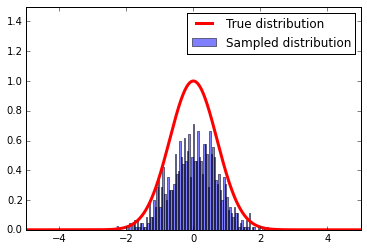

In [3]:
#create an array of numbers describing a Gaussian/Normal/Bell Curve distribution
x = np.arange(-5.,5.,0.002)
f = e**(-x**2)

#generate 1000 samples that follow this distribution
xsamples = distribute1D(x,f,1000)

#Make a histogram of the samples and compare to the original function
plt.plot(x,f,label='True distribution',lw=3,color='red')
plt.hist(xsamples,bins=100,normed=True,label="Sampled distribution",alpha=0.5)

plt.ylim(0,1.5)
plt.xlim(-5,5.)
plt.legend()

plt.show()

Notice that the samples do not match the true distribution.  Why is that?  The function has a maximum value of 1.0, but the sampled distribution is a *probability* distribution, which means that the *sum* or integral of all the values must equal 1.0, so the maximum of any given value of the distribution *must be* less than 1.0.  

Also notice that the sampled distribution is a bit spiky.  These are called statistical fluctuations.  That's the nature of probability.  Every sample is selected randomly and independently of every other. Sometimes you get more samples from one part of the distribution than others.  The more samples you take, the smoother the distribution will be.

Let's use these tools to create some simulated nuclei.

---

**(b)** Let’s create a realistic distribution for two gold ions, A, and B. 

* First, use the `distribute1d` function to sample $r$ values numerically and distribute 197 nucleons for each nucleus.  The Woods-Saxon distribution multiplied by the spherical coordinate weighting factor, $r^2$ (the second curve in your plot from part (a)) shows the distribution to sample.  We need to apply the factor $r^2$ because the 3-D volume element $dV = r^2\sin\theta dr d\theta d\phi$ has radial dependence.  Imagine concentric shells distributed about the central point of a sphere.  Each successive shell has a larger surface area than the one interior to it.  It should be more probable that a nucleon is found on one of the outer shells than on an inner shell because there are more places for the nucleon to be.  The factor of $r^2$ accounts for that.

In [ ]:
#Your code here

**(c)** Now, let's get the angular coordinates of the nucleons.  We will need to apply another special transformation to the polar angle $\theta$ because the 3-D volume element $dV = r^2\sin\theta dr d\theta d\phi$ has polar angle dependence.  If you do not do the transformation, your results will be bunched up at the poles and not uniformly distributed inside of the sphere.  It's a little bit harder to visualize because of the sinusoidal dependence but this method makes sure the nucleons are correctly distributed in polar angle like the factor of $r^2$ does in the radial dimension.

* Use uniform sampling of a number $u$ from [0,1) scaled by $2\pi$ to obtain the azimuthal angle $\phi$ = 2$\pi u$ 

* Followed by uniform sampling of another number $v$ = [0,1), transformed to $\theta = \cos^{-1}(2v - 1)$ to obtain the polar angle $\theta$.  

(Note that this is the physics definition of azimuthal and polar angles, not the math definition.)

Once you have the spherical coordinates for each of the nucleons in each nucleus, convert to cartesian coordinates.   In nuclear collisions, the beam axis along which the particles travel/collide is the $z$ axis.  The polar angle $\theta$ is measured *up* from the positive-$z$ axis and the azimuthal angle $\phi$ is measured *up* from the positive $x$-axis.

In [ ]:
#Your code here

**(d)** Now plot the nuclei in 2D for two different planar projections: the beam's eye view ($x$-$y$) and the side view ($x$-$z$) side-by-side.  Let the nucleons have diameter of 1 fm, make the nucleons from each nucleus a different color, and displace them by a randomly chosen impact parameter $b$ between 0 and 18 fm.  For example, shift ion A by $b/2$ to the left along the $x$-axis and B by $b/2$ to the right along the x-axis.

In [ ]:
#your code here

Your results should look something like this:
<img src="MC_c.png" width=400>

I used the "alpha" parameter of the `plot` options to set the transparency of the nucleons.

**(e)** Since we cannot measure the impact parameter directly for each collision, we need a method to estimate the geometric overlap so that we can categorize the collisions based on the number of nucleons participating in each collision and how many nucleon-nucleon collisions occurred.   Nucleons that pass close enough to each other will experience an inelastic collision that will rip the quarks right out of the nucleon.  The distance that dictates when an inelastic collision occurs is governed by the interaction cross-section, which has been measured very carefully at proton colliders.  The inelastic cross-section at collision energy of 200 GeV is $\sigma_{inel}$ = 42 mb (1 mb = 1 millibarn = 10$^{-24}$ cm$^2$ = 10$^{-31}$ m$^2$), defining an overlap area between two nucleons.  

Make an `interact` object for your two plots in part (c) that let's you vary the impact parameter from 0 to 18 fm.  On the plots, change the color of the nucleons that "participate" in interactions to something else. (Let the participating nucleons in nucleus A be one color and those in nucleus B be another color, like you did in part (d).) 

To do this, you’ll need to find all the nucleons from nucleus A that are within a distance, $D$, of a nucleon from nucleus B using $D = \sqrt{\sigma_{inel}/\pi}$, where $\sigma_{inel}$ is the cross sectional area measured in millibarns.  Don’t forget to convert the millibarns to fm$^{2}$.

In [ ]:
# Your code here

Your results should look something like this:
<img src="MC_d.png" width=400>

This example includes extra sliders to let you also vary the type of nucleus.  For an extra challenge, see if you can do the same.  The sliders let you choose which two nuclei to collide and then selects the correct Woods-Saxon parameters for that nucleus.  With this setup you can see what asymmetric (i.e. Gold+Copper) collisions would look like.  Have fun!

---